In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os 
os.chdir("/content/drive/My Drive/fast.ai v3/section 2/cust_dl_lib")

!git config --global user.email "rajp152000@gmail.com"
!git config --global user.name "rajp152k"
!pip install fire
import fire

     |████████████████████████████████| 81kB 4.0MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103527 sha256=1a482c3cf9b437d07c4055d3d294202a48d3a7869bb24f3d4b2a4ba58f5fed03
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire


# Matrix multiplication fundamentals
## progression:

    - looping thrice
    - element wise operations
    - broadcasting
    - einstein summations
    - achieving performance similary to pytorch's standards

testing framework

In [0]:
#export
from exps.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [0]:
test_eq(TEST,'test')

In [31]:
test_eq(TEST,'test2')

AssertionError: ignored

In [10]:
!python run_notebook.py 01_matmul.ipynb

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
Traceback (most recent call last):
  File "run_notebook.py", line 12, in <module>
    if __name__ == '__main__': fire.Fire(run_notebook)
  File "/usr/local/lib/python3.6/dist-packages/fire/core.py", line 138, in Fire
    component_trace = _Fire(component, args, parsed_flag_args, context, name)
  File "/usr/local/lib/python3.6/dist-packages/fire/core.py", line 471, in _Fire
    target=component.__name__)
  File "/usr/local/lib/python3.6/dist-packages/fire/core.py", line 675, in _CallAndUpdateTrace
    component = fn(*varargs, **kwargs)
  File "run_notebook.py", line 9, in run_notebook
    ExecutePreprocessor(timeout=600).preprocess(nb, {})
  File "/usr/local/lib/python3.6/dist-packages/nbconvert/preprocessors/execute.py", line 405, in preprocess
    nb, resources

testing mechanics working correcly

# Proceeding

Getting data

In [0]:
#export 
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle,gzip,math,torch,matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

In [0]:
datasets_path = Path("/content/drive/My Drive/fast.ai v3/datasets")
MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [5]:
path = datasets.download_data(url=MNIST_URL,fname=datasets_path/'MNIST.gz',ext='.gz');path

PosixPath('/content/drive/My Drive/fast.ai v3/datasets/MNIST.gz')

In [0]:
with gzip.open(path,'rb') as f:
    ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f,encoding='latin1')

In [8]:
x_train,y_train,x_valid,y_valid = map(tensor,(x_train,y_train,x_valid,y_valid))
n,c = x_train.shape # no of rows and columns
x_train,x_train.shape,y_train,y_train.shape,y_train.min(),y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

# checking dataset metadata

In [0]:
assert n==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [0]:
mpl.rcParams['image.cmap']=  'gray'

In [0]:
img = x_train[0]

In [12]:
img.view(28,28).type() # compiling a flattened out pixel array

'torch.FloatTensor'

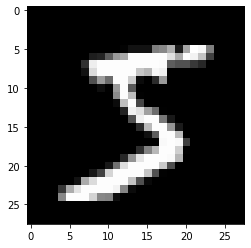

In [13]:
plt.imshow(img.view(28,28))

# Testing the waters

In [0]:
weights = torch.randn(784,10)   # the transformation matrix for a simple matrix multiplication
                                # predictor model
                                # transforms a 784-vector to 10-vector (indentified output)

In [0]:
bias = torch.zeros(10)

## Matrix Multiplication

In [0]:
def matmul(a,b):
    ar,ac = a.shape # n of rows and cols
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] + b[k,j]
    return c

In [0]:
m1 = x_valid[:5] # bacth size of 5
m2= weights

In [54]:
%timeit t1 = matmul(m1,m2)

1 loop, best of 3: 845 ms per loop


In [0]:
# element wise matrix multiplication
def matmul(a,b):
    ar,ac = a.shape # n of rows and cols
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
                c[i,j] += (a[i,:]*b[:,j]).sum()
    return c


In [56]:
%timeit -n 10 _=matmul(m1,m2)

10 loops, best of 3: 2.02 ms per loop


In [0]:
#export 
def near(a,b): return torch.allclose(a,b,rtol=1e-3,atol=1e-5)
def test_near(a,b): test(a,b,near)

In [0]:
test_near(t1,matmul(m1,m2))

In [0]:
# broadcasting
def matmul(a,b):
    ar,ac = a.shape # n of rows and cols
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
                c[i] = ((a[i,:].unsqueeze(-1))*b).sum(0)
    return c

In [63]:
%timeit -n 10 _=matmul(m1,m2)

10 loops, best of 3: 253 µs per loop


In [0]:
test_near(t1,matmul(m1,m2))

## Einstein Summation

refer torch docs for further info

In [0]:
def matmul(a,b): return torch.einsum('ik,kj->ij',a,b)
# dot product and sum along the common dimension
# for a batch matmul (say a 3d tensor with batch dimension label b) 
    # can be represented as a (bij,bkj->bij)

In [67]:
%timeit -n 10 _=matmul(m1,m2)

The slowest run took 68.17 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 43.2 µs per loop


that's fast <br>
sped up by :

In [68]:
845*1e-3/(43.2*1e-6)

19560.185185185186

## pytorch @

In [70]:
%timeit -n 10 t2 = m1@m2

The slowest run took 7.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 13.6 µs per loop


around 80,000 times faster

# EXPORT

In [75]:
!python notebook2script.py 01_matmul.ipynb
# exporting test functions 
# can use @ from now on for matrix multiplication

Converted 01_matmul.ipynb to exps/nb_01.py


# NOTE

exports are cumulative: nb i contains exports from nb i-1